In [1]:
import torch
import matplotlib.pyplot as plt
import os
os.chdir('..')
from GAN import Generator

In [2]:
def load_generator(model_path, latent_dim, img_channels, hidden_dim, device):
    generator = Generator(latent_dim, img_channels, hidden_dim).to(device)
    generator.load_state_dict(torch.load(model_path, map_location=device))
    generator.eval()
    return generator

In [3]:
def generate_images(generator, num_samples, latent_dim, device):
    z = torch.randn((num_samples, latent_dim), device=device)
    with torch.no_grad():
        fake_images = generator(z).cpu()
    return fake_images

def visualize_images(images, nrow=5):
    from torchvision.utils import make_grid
    grid = make_grid(images, nrow=nrow, normalize=True)
    plt.figure(figsize=(10, 10))
    plt.imshow(grid.permute(1, 2, 0).numpy())
    plt.axis('off')
    plt.show()

In [4]:
DI_gen_path = "DI_models/DI_generator.pth"  # Path to the trained generator
latent_dim = 128
img_channels = 1
hidden_dim = 128
num_samples = 25
device = 'cuda' if torch.cuda.is_available() else 'cpu'

generator = load_generator(DI_gen_path, latent_dim, img_channels, hidden_dim, device)

/tmp/ipykernel_584016/1630086958.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator.load_state_dict(torch.load(model_path, map_location=device))


In [5]:
generated_images = generate_images(generator, num_samples, latent_dim, device)

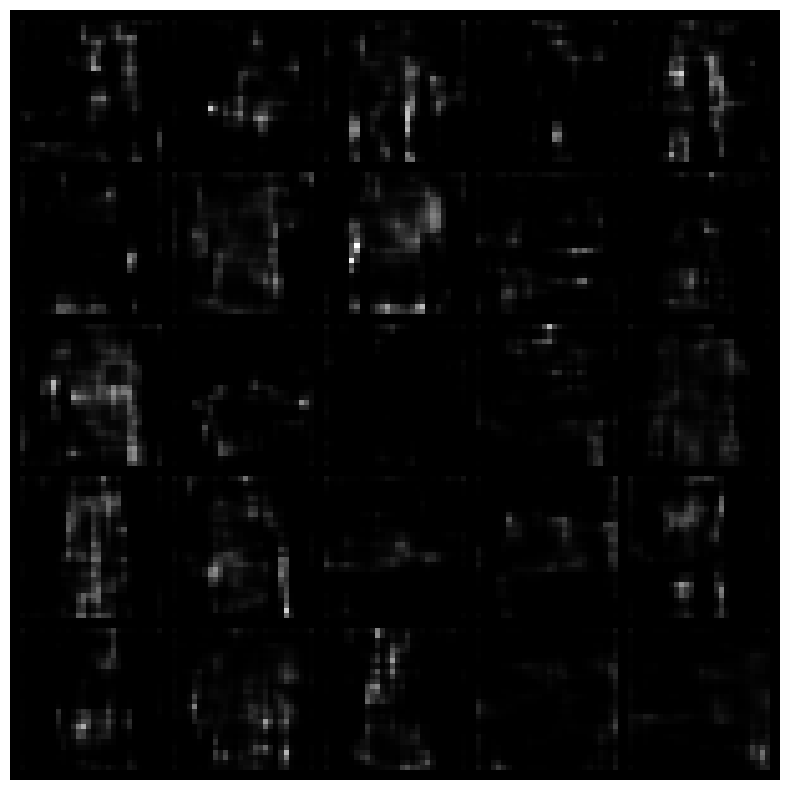

In [6]:
visualize_images(generated_images)